In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [127]:
titanic = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [128]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


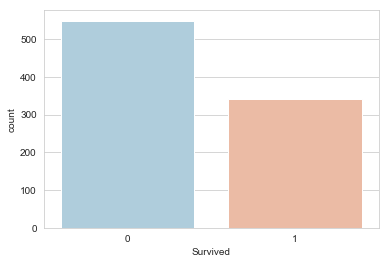

In [129]:
#people who survived v/s who didn't
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= titanic, palette='RdBu_r')

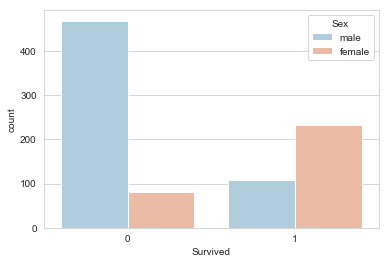

In [130]:
sns.countplot(x='Survived', hue='Sex', data= titanic,palette='RdBu_r')

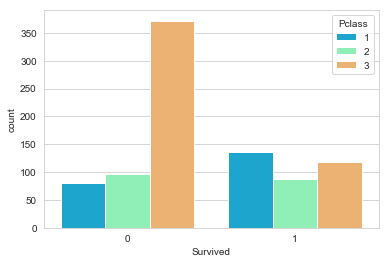

In [131]:
sns.countplot(x='Survived', hue='Pclass', data= titanic, palette='rainbow')

C:\Users\Varad Srivastava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


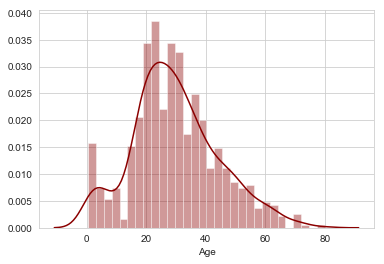

In [132]:
sns.distplot(titanic['Age'].dropna(),color='darkred',bins=30)

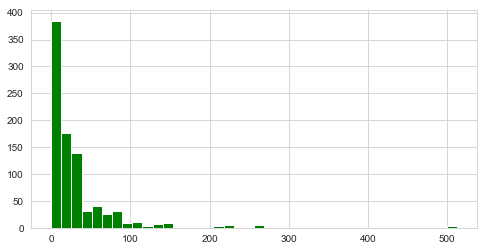

In [133]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

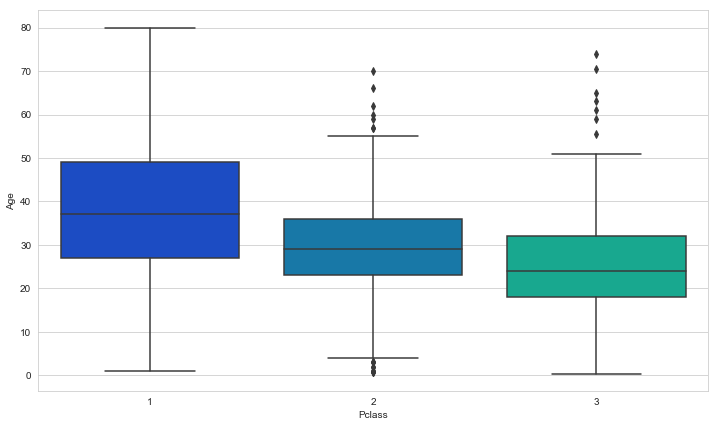

In [134]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [135]:
def impute_age(cols):
   Age = cols[0]
   Pclass = cols[1]
   if pd.isnull(Age):
       if Pclass == 1:
           return 37
       elif Pclass == 2:
           return 29
       else:
           return 24
   else:
       return Age

In [136]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis = 1)
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [137]:
def impute_cabin(col):
   Cabin = col[0]
   if type(Cabin) == str:
       return 1
   else:
       return 0

In [138]:
titanic['Cabin'] = titanic[['Cabin']].apply(impute_cabin, axis = 1)
test_data['Cabin'] = test_data[['Cabin']].apply(impute_cabin, axis = 1)


In [139]:
dataset = titanic
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
dataset = pd.concat([dataset,sex,embark],axis=1)

sex = pd.get_dummies(test_data['Sex'],drop_first=True)
embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_data = pd.concat([test_data,sex,embark],axis=1)

In [140]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [141]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1),dataset['Survived'], test_size=0.25,random_state=101)


In [142]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

print(accuracy_score(y_test, pred))

0.757847533632287


In [143]:
regressor2 = SVC()
regressor2.fit(X_train, y_train)

pred2 = regressor2.predict(X_test)
print(accuracy_score(y_test, pred2))

0.5560538116591929


In [144]:
regressor4 = AdaBoostClassifier()
regressor4.fit(X_train, y_train)

pred4 = regressor4.predict(X_test)
print(accuracy_score(y_test, pred4))

0.7668161434977578


In [159]:
regressor4.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [160]:
test_data.info()
X_test.info()

# mark zero values as missing or NaN
test_data = test_data.replace(0, np.NaN)
# fill missing values with mean column values
test_data.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(test_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
male           418 non-null float64
Q              418 non-null float64
S              418 non-null float64
dtypes: float64(8), int64(2)
memory usage: 32.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 331 to 475
Data columns (total 10 columns):
PassengerId    223 non-null int64
Pclass         223 non-null int64
Age            223 non-null float64
SibSp          223 non-null int64
Parch          223 non-null int64
Fare           223 non-null float64
Cabin          223 non-null int64
male           223 non-null uint8
Q              223 non-null uint8
S              223 non-null uint8
dtypes: float64(2), int64(5), uint8(3

In [170]:
prediction = regressor4.predict(test_data)

In [203]:
prediction = np.reshape(prediction, (418,1))
id = test_data.iloc[:,0].values
id = np.reshape(id, (418,1))
result = np.append(arr = id,values = prediction, axis = 1)


In [204]:
print(result)

[[ 892    0]
 [ 893    0]
 [ 894    0]
 [ 895    0]
 [ 896    0]
 [ 897    0]
 [ 898    0]
 [ 899    0]
 [ 900    0]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    0]
 [ 905    0]
 [ 906    0]
 [ 907    0]
 [ 908    0]
 [ 909    0]
 [ 910    0]
 [ 911    0]
 [ 912    0]
 [ 913    0]
 [ 914    0]
 [ 915    0]
 [ 916    1]
 [ 917    0]
 [ 918    0]
 [ 919    0]
 [ 920    0]
 [ 921    0]
 [ 922    0]
 [ 923    0]
 [ 924    0]
 [ 925    0]
 [ 926    0]
 [ 927    0]
 [ 928    0]
 [ 929    0]
 [ 930    0]
 [ 931    0]
 [ 932    0]
 [ 933    0]
 [ 934    0]
 [ 935    0]
 [ 936    0]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    0]
 [ 941    0]
 [ 942    0]
 [ 943    0]
 [ 944    0]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948    0]
 [ 949    0]
 [ 950    0]
 [ 951    1]
 [ 952    0]
 [ 953    0]
 [ 954    0]
 [ 955    0]
 [ 956    1]
 [ 957    0]
 [ 958    0]
 [ 959    0]
 [ 960    0]
 [ 961    1]
 [ 962    0]
 [ 963    0]
 [ 964    0]
 [ 965    0]
 [ 966    0]
 [ 967    0]
 [ 968    0]

In [209]:
np.savetxt("Titanic_Results.csv", result , delimiter=",", fmt = '%.0f')